<a href="https://colab.research.google.com/github/giuli-c/KNN_Classifier/blob/main/Classificatore_FruttiEsotici_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATORE DI FRUTTI EESOTICI
TropicTaste Inc., leader nella distribuzione di frutti esotici, punta a ottimizzare l’efficienza e la precisione nel processo di classificazione dei prodotti. Questo progetto mira a sviluppare un modello di machine learning in grado di automatizzare la classificazione dei frutti basandosi su caratteristiche numeriche, riducendo gli errori umani e migliorando la gestione dell'inventario.

## OBBIETTIVO DEL PROGETTO
L'obbiettivo del progetto è quello di sviluppare un modello di Machine Learning per la classificazione automatizzata dei frutti esotici basata su caratteristiche numeriche, riducendo errori umani, ottimizzando l'inventario e migliorando l'efficienza operativa e la qualità del prodotto.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Esplorazione del Dataset:
Caricamento e preprocessamento dei dati sui frutti esotici.
Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.

1. Verifico il numero di righe e colonne del dataset.
2. Verifico la tipologia di ogni variabile.
3. Verifico la presenza di valori nulli, mancanti o outlier.






4. ENCODING DEI DATI. Vediamo che ci sono delle varibili categoriche alla quale è necessario fare l'encoding.
* LabelEncoding per variabili varibili categoriche normali (Gender - Vehicle_Damage).
* Mapping per variabili varibili categoriche ordinali (Vehicle_Age). Il mapping permette di effettuare un controllo migliore sulla correlazione delle veriabili.
5. Visualizzo la distribuzione delle varibiali target.
Descrizione statistica delle valriabili numeriche:
Response: identifica se c'è uno sbilanciamento tra i dati
Annual Premium: esplora la distribuzione dei premi annuali e come influenzano la decisione del cliente.
Vehicle Age e Previously Insured: analizza le caratteristiche dei veicoli e se i clienti erano precedentemente assicurati.

In [177]:
upload_file = files.upload()

Saving fruits.csv to fruits (3).csv


In [178]:
file_name = next(iter(upload_file))

In [179]:
df = pd.read_csv(file_name)
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [180]:
df.shape

(500, 6)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [182]:
# Guardo che valori può contenere la colonna "Frutto"
df["Frutto"].unique()

array(['Mela', 'Banana', 'Arancia', 'Uva', 'Kiwi'], dtype=object)

In [183]:
# guardo se ci sono dei valori null
df.isnull().sum()

,0
Frutto,0
Peso (g),0
Diametro medio (mm),0
Lunghezza media (mm),0
Durezza buccia (1-10),0
Dolcezza (1-10),0


In [184]:
# guardo se ci sono dei valori ripetuti
df.duplicated().sum()

0

In [185]:
# verifico la presenza di outlier
df.describe()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


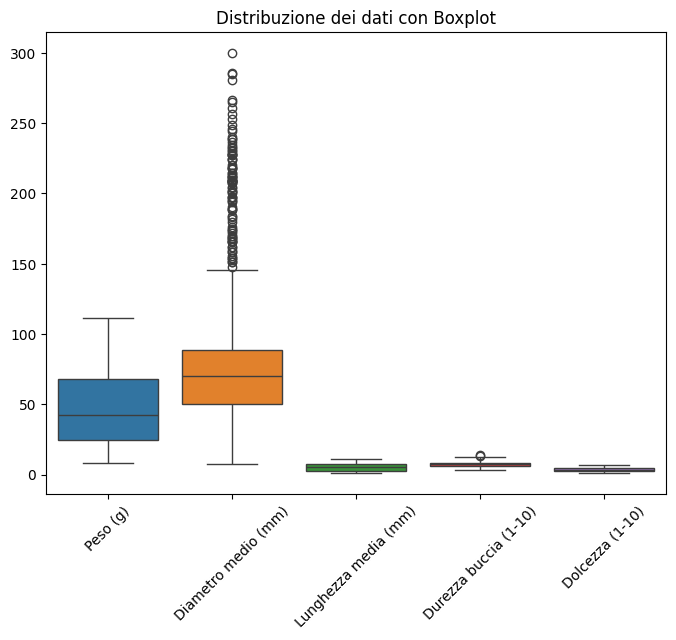

In [186]:
# Rappresento con Boxplot gli oulier
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Distribuzione dei dati con Boxplot")
plt.show()

**ANALISI DELLA TABELLA**
* **Dispersione dei valori (Deviazione Standard - std)**
Le variabili con maggiore dispersione (valori più lontani dalla media) sono:
  * Peso (g): std = 26.77, indicando una grande variabilità tra i campioni.
  * Diametro medio (mm): std = 64.29, il valore più alto, suggerendo una forte dispersione nei dati.
  * Durezza buccia (1-10): std = 1.81.
* **Distribuzione dei dati (Mediana - 50%). Analizzando la mediana rispetto alla media:**
  * Peso (g): Mediana = 42.38, molto vicina alla media 47.31, suggerendo una distribuzione quasi simmetrica.
  * Diametro medio (mm): Mediana = 70.45, significativamente più bassa della media 86.57, indicando una distribuzione asimmetrica con valori più grandi della media.
  * Per tutte le altre variabili, la mediana è molto vicina alla media, suggerendo una distribuzione più equilibrata con variazioni più contenute.

**ANALISI DEL GRAFICO**
* **"Diametro medio (mm)"**
Questa feature presenta numerosi outlier visibili nel boxplot.
Ci sono molti punti oltre i baffi superiori, indicando che alcuni frutti hanno dimensioni molto più grandi rispetto alla media.
* **"Durezza buccia (1-10)"**
Mostra la presenza di qualche outlier rappresentati da pochi punti fuori dai baffi superiori del box plot.
* Tutte le altre variabili mostrano una distribuzione più uniforme, con poche variazioni estreme. Il Peso (g), pur avendo una deviazione standard elevata, non presenta outlier estremi. Questo indica che, sebbene ci sia una variazione ampia nei valori, non ci sono valori anomali isolati.

Dal momento che il Peso (g) ha un’alta deviazione standard ma senza outlier evidenti, rappresentiamo tutte le feature attraverso uno scatterplot.



In [187]:
# UTILIZZO DELLO Z-SCORE, per veder quanto un valore è distanze dalla media:
from scipy.stats import zscore

def calcolo_outlier(col_name):
  # Calcoliamo lo Z-score
  z_score = zscore(df[col_name])

  # Troviamo gli outlier con Z-score > 3 o < -3
  outliers = df[abs(z_score) > 3]
  print(f"Numero di outlier nella colonna {col_name} usando Z-score: {len(outliers)}")

  return outliers

In [188]:
def design_single_scatterplot(ax, col_name, color):
  outliers = calcolo_outlier(col_name)

  sns.scatterplot(y=df[col_name], x=range(len(df)), ax=ax, color=color, alpha=0.6, label = "Dati")

  # Evidenzio gli outlier in rosso
  sns.scatterplot(y=outliers[col_name], x=outliers.index, ax=ax, color="red", s=100, edgecolor="black", label="Outlier")

  ax.set_title(f"Scatter Plot - {col_name}")
  ax.set_xlabel("Campioni")
  ax.set_ylabel(col_name)
  ax.legend()

Numero di outlier nella colonna Peso (g) usando Z-score: 0
Numero di outlier nella colonna Diametro medio (mm) usando Z-score: 4
Numero di outlier nella colonna Lunghezza media (mm) usando Z-score: 0
Numero di outlier nella colonna Durezza buccia (1-10) usando Z-score: 2
Numero di outlier nella colonna Dolcezza (1-10) usando Z-score: 0


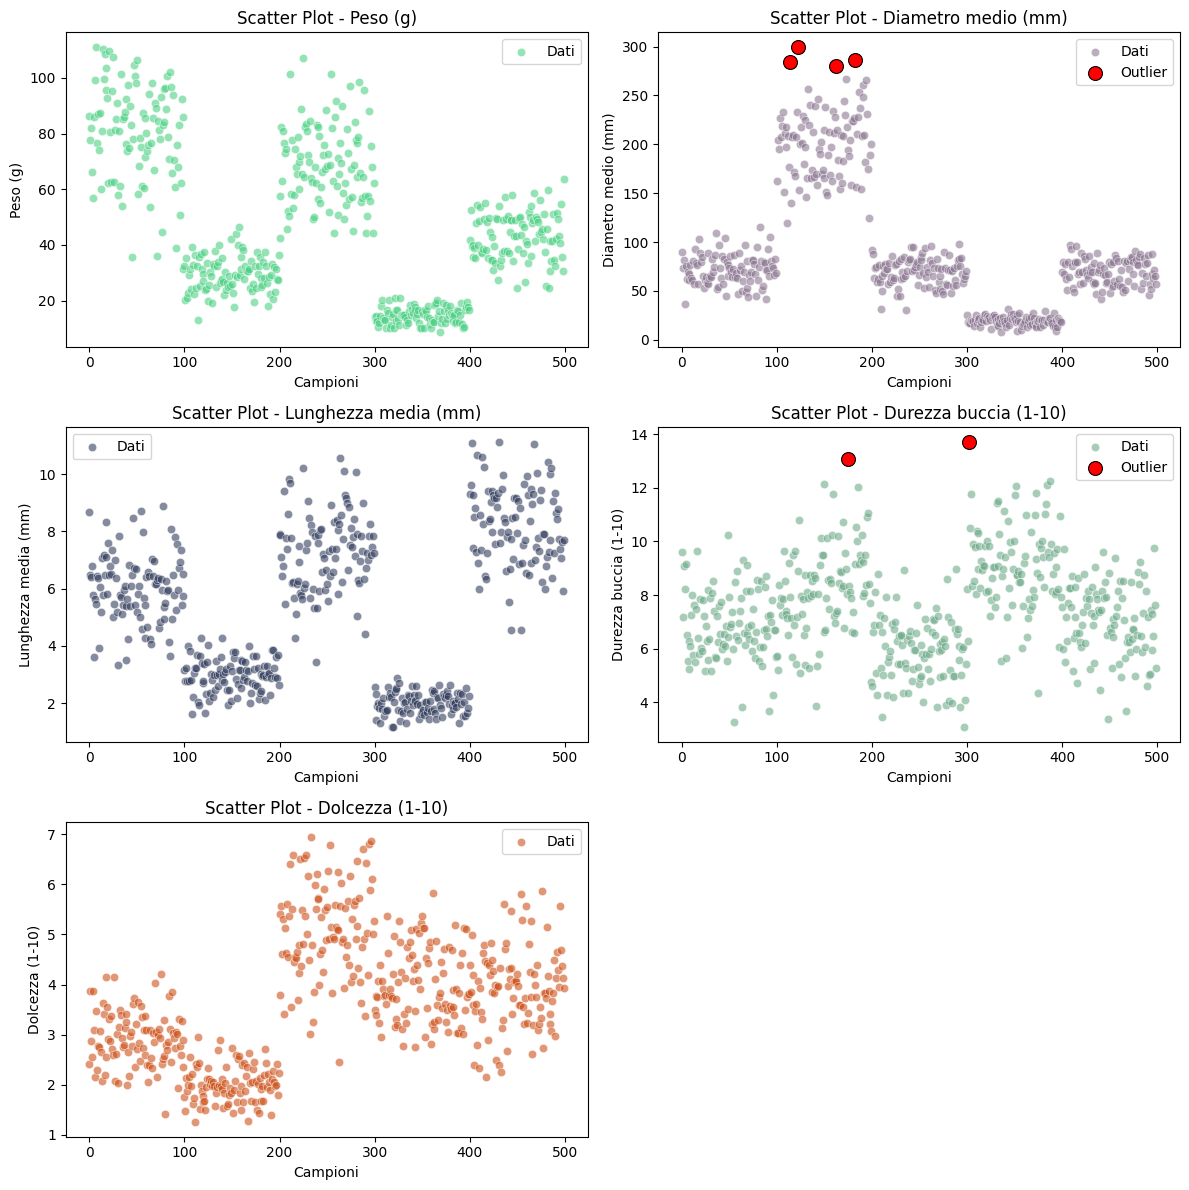

In [189]:
import random

# N. di colonne senza frutto
num_col = df.shape[1]-1
num_righe = (num_col//2) + (num_col%2) # Se num_colonne è dispari, aggiunge una riga extra

fig, axes = plt.subplots(nrows=num_righe, ncols=2, figsize=(12, num_righe*4))

for i, col_name in enumerate(df.drop("Frutto", axis=1).columns):
  row, col = i // 2, i % 2  # Impostazione nel grid
  design_single_scatterplot(axes[row, col], col_name, "#{:06x}".format(random.randint(0, 0xFFFFFF)))

# Nascono gli scatterplot vuoti > essendo dinamico
for j in range(i+1, num_righe*2):
  fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Gli scatter plot rappresentano la distribuzione delle diverse feature del dataset rispetto ai campioni, consentendo di individuare eventuali cluster, tendenze e la presenza di outlier.

**Il Peso (g)** presenta una distribuzione ampia, con cluster ben separati, indicando la presenza di categorie diverse nel dataset. Non sono presenti outlier, poiché tutti i punti si distribuiscono entro un range coerente con la distribuzione generale.

**Diametro medio (mm)** evidenzia più gruppi distinti, coerenti con i cluster osservati nel peso. Sono evidenziati 4 oulier, identtificati da punti rossi, che suggeriscono che alcuni frutti abbiano un diametro anomalo rispetto agli altri.

**Durezza buccia (1-10)** presenta una distribuzione più dispersa, con valori che variano. Son presenti un paio di outlier, che indicano probabilmente la presenza di frutti con una durezza della buccia più alta rispetto ad altri.

Per le altre feature invece non sono presenti outlier. **Dolcezza (1-10)** mostra una graduale diminuzione della dolcezza in relazione ai campioni, mentre **Lunghezza media (mm)** presenta una struttura simile a quella del peso con cluster ben definiti.



In [190]:
# MAPPATURA DELLA COLONNA TARGET. LABEL ENCODING.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Frutto"] = encoder.fit_transform(df["Frutto"])
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,3,86.40,89.68,8.69,9.61,2.41
1,3,77.58,73.45,6.49,7.20,3.87
2,3,81.95,81.66,6.40,9.09,2.88
3,3,66.33,36.71,6.78,8.21,2.55
4,3,56.73,75.69,5.78,9.15,3.88


In [191]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'Arancia': 0, 'Banana': 1, 'Kiwi': 2, 'Mela': 3, 'Uva': 4}

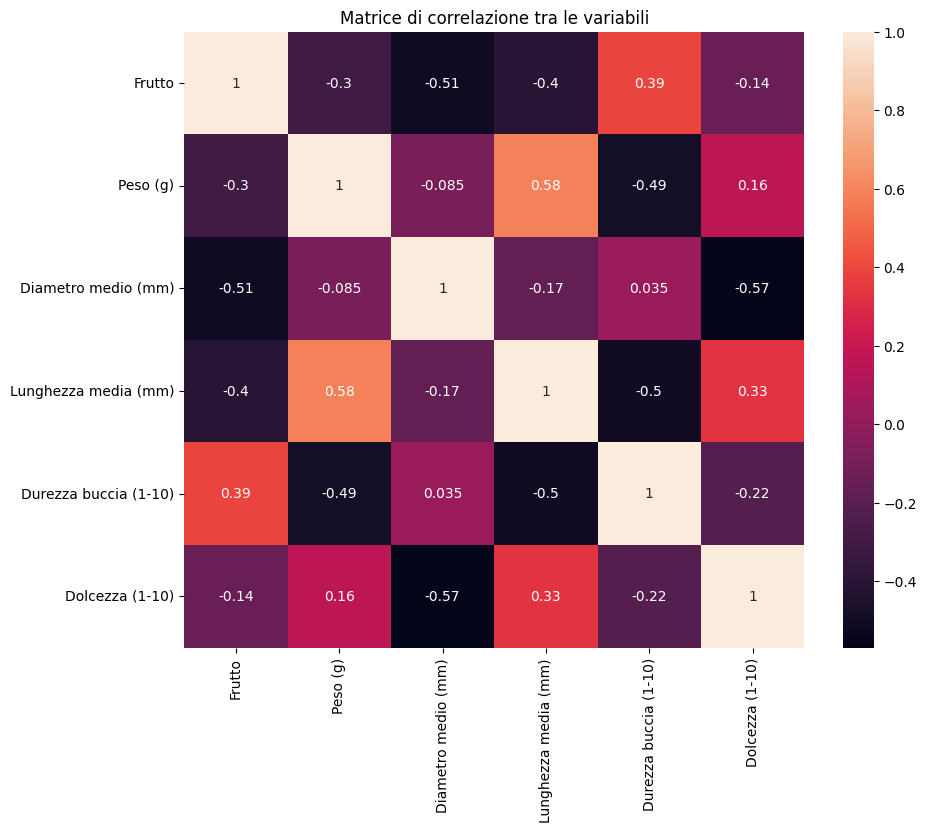

In [192]:
# MATRICE DI CORRELAZIONE:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cbar=True, annot=True)
plt.title("Matrice di correlazione tra le variabili")
plt.show()

**CORRELAZIONI:**
- **Peso.**
  Sembra che i frutti più pesanti tendano ad avere:
    - *Diametro medio (-0.085)*: non esiste quasi relazione.
    - *Lunghezza media (0.58)*: anche una lunghezza maggiore.
    - *Durezza buccia (-0.49)*: una buccia meno dura.
    - *Dolcezza (0.16)*: una leggera tendenza ad una maggiorre dolcezza.
- **Diametro medio.**
  Sembra che i frutti con diametro più grande tendano ad avere:
    - *Lunghezza media (-0.17)*: siano meno lunghi.
    - *Dolcezza (-0.57):* una dolcezza minore.
- **Lunghezza media.**
  Sembra che i frutti più lunghi tendano ad avere:
    - *Durezza buccia (-0.5)*: una buccia meno dura.
    - *Dolcezza (0.33)*: una dolcezza maggiore.
- **Durezza buccia**.
  Sembra che i frutti con una buccia più dura tendano ad avere:
    - *Dolcezza (-0.22):* una dolcezza minore.

La feature più correlata con la variabile target è il **Diametro Medio (-0.51)**.
Un valore negativo significa che aumentando il diametro medio, il frutto tende ad appartenere ad una categoria con valore numerico più basso (es. se "Mela" ha valore 0 e "Kiwi" ha valore 4, vuol dire che i frutti con diametro maggiore sono più simili alle Mele).

In definitiva la matrice non mostra relazioni eccessivamente significative, ma possiamo identificare in tal modo quali sono le feature che differenziano bene i frutti.
Dalla matrice di correlazione, possiamo notare che:
* **Peso e lunghezza media** hanno una correlazione positiva elevata (0.58), quindi potrebbero fornire informazioni simili.
* **Diametro medio e dolcezza** hanno una forte correlazione negativa (-0.57). Questo suggerisce che il diametro è un buon indicatore per distinguere frutti più dolci da quelli meno dolci.
* **Durezza della buccia e lunghezza media** (-0.50) potrebbero anch'essi aiutare a differenziare i frutti.


In [193]:
# Devo trovare il K migliore - Cross-Validation e GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Standardizzazione
ss = StandardScaler()
# Definizione del range di K da testare
param_grid = {'n_neighbors': range(1, 101)}

def split_and_scale_data(X, y, random_state=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

  X_train = ss.fit_transform(X_train)
  X_test = ss.transform(X_test)

  # creazione del modello
  knn = KNeighborsClassifier()

  # Applico il GridSearchCV con 5-fold Cross-Validation
  grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
  # Eseguire la ricerca del miglior K
  grid_search.fit(X_train, y_train)

  # Miglior valore di k
  print("Miglior k trovato:", grid_search.best_params_['n_neighbors'])
  print("Miglior accuratezza:", grid_search.best_score_)

  return grid_search, X_train, X_test, y_train, y_test


## PROVA 1: utilizzo tutti i dati a mia disposizione.
Suddivisione del dataset senza eliminare features.


In [194]:
X = df.drop("Frutto", axis=1)
y = df["Frutto"]
grid_search, X_train, X_test, y_train, y_test = split_and_scale_data(X, y)

Miglior k trovato: 95
Miglior accuratezza: 0.9299999999999999


## PROVA 2: Elimino Peso


In [195]:
X2 = df.drop(["Frutto", "Peso (g)"], axis=1)
y2 = df["Frutto"]

grid_search2, X_train2, X_test2, y_train2, y_test2 = split_and_scale_data(X2, y2)

Miglior k trovato: 44
Miglior accuratezza: 0.8825


## PROVA 3: Elimino Lunghezza media

In [196]:
X3 = df.drop(["Frutto", "Lunghezza media (mm)"], axis=1)
y3 = df["Frutto"]

grid_search3, X_train3, X_test3, y_train3, y_test3 = split_and_scale_data(X3, y3)

Miglior k trovato: 11
Miglior accuratezza: 0.9125


## PROVA 4: Elimino la feature Dolcezza, valore che sembra essere meno correlato al nostro output

In [197]:
X4 = df.drop(["Frutto", "Dolcezza (1-10)"], axis=1)
y4 = df["Frutto"]

grid_search4, X_train4, X_test4, y_train4, y_test4 = split_and_scale_data(X4, y4)

Miglior k trovato: 23
Miglior accuratezza: 0.8474999999999999


RISULTATO:\
Mantenendo entrambe le variabili i risultati sono migliori. Creo quindi iol mio modello partendo da k=95.

### Valutazione delle Performance:
Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.

In [208]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], weights='uniform')
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
print(f"Score: {score:.2f}")

y_pred = knn.predict(X_test)
print("DATI:")
print(classification_report(y_pred, y_test))

Score: 0.94
DATI:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       1.00      1.00      1.00        14
           2       0.88      0.95      0.91        22
           3       0.96      0.93      0.95        29
           4       1.00      1.00      1.00        24

    accuracy                           0.94       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.94      0.94      0.94       100



In [209]:
# ERRORE DI CLASSIFICAZIONE:
error_rate = 1 - score
print(f"Errore di classificazione: {error_rate:.2f}")

Errore di classificazione: 0.06


In [210]:
## Rappresentazione dell'acccuracy e errore di classificazione per ogni K (a multipli di 5)
def plot_accuracy_error(X_train, X_test, y_train):
  metrics_dict = {}

  k_values = [x for x in range(1,101) if x%5==0]

  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    metrics_dict[k] = [knn.score(X_test, y_test), 1-knn.score(X_test, y_test)]

  return metrics_dict

In [211]:
metrics_dict = plot_accuracy_error(X_train, X_test, y_train)
metrics_dict

{5: [0.87, 0.13],
 10: [0.88, 0.12],
 15: [0.9, 0.09999999999999998],
 20: [0.93, 0.06999999999999995],
 25: [0.92, 0.07999999999999996],
 30: [0.92, 0.07999999999999996],
 35: [0.92, 0.07999999999999996],
 40: [0.93, 0.06999999999999995],
 45: [0.93, 0.06999999999999995],
 50: [0.92, 0.07999999999999996],
 55: [0.91, 0.08999999999999997],
 60: [0.92, 0.07999999999999996],
 65: [0.93, 0.06999999999999995],
 70: [0.92, 0.07999999999999996],
 75: [0.92, 0.07999999999999996],
 80: [0.92, 0.07999999999999996],
 85: [0.93, 0.06999999999999995],
 90: [0.94, 0.06000000000000005],
 95: [0.94, 0.06000000000000005],
 100: [0.93, 0.06999999999999995]}

In [212]:
k_values = list(metrics_dict.keys())
accuracy_rates = [metrics_dict[k][0] for k in k_values]
error_rates = [metrics_dict[k][1] for k in k_values]

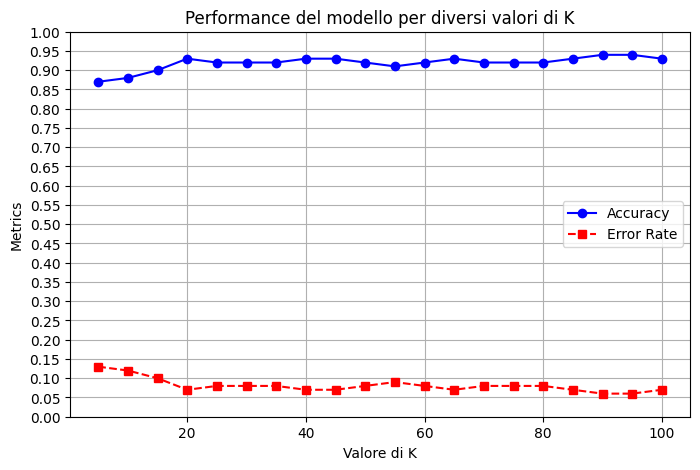

In [213]:
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_rates, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(k_values, error_rates, marker='s', linestyle='--', color='red', label='Error Rate')

yticks_values = np.arange(0, 1.05, 0.05)  # Più intervalli sull'asse Y
plt.yticks(yticks_values)  # Imposta i valori dei tick su Y

plt.xlabel('Valore di K')
plt.ylabel("Metrics")
plt.title("Performance del modello per diversi valori di K")
plt.legend()
plt.grid(True)

Mettendo a confronto i valori assunti dall'accuracy e dall'errore di classificazione per ogni k a disposizione, vediamo che il risultato ottimale viene raggiunto come visto dal 'GridSearchCV con 5-fold Cross-Validation' con k=95.

### Visualizzazione dei Risultati:
Creazione di grafici per visualizzare e confrontare le performance del modello.
Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.

Text(50.722222222222214, 0.5, 'Valore Reale')

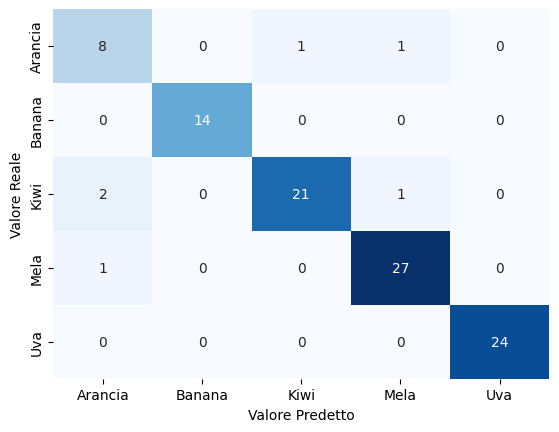

In [214]:
#Matrice di Confusione: per capire dove il modello sbaglia
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valore Predetto')
plt.ylabel('Valore Reale')

**CLASSIFICAZIONI CORRETTE:**
* Arancia: Classificata correttamente 8 volte.
* Banana: Classificata correttamente 14 volte.
* Kiwi: Classificato correttamente 21 volte.
* Mela: Classificata correttamente 27 volte.
* Uva: Classificata correttamente 24 volte.

**CLASSIFICAZIONI ERRATE:**
* 1 Arancia è stata classificata come Kiwi.
* 1 Arancia è stata classificata come Mela.
* 2 Kiwi sono stati classificati come Arancia.
* 1 Kiwi è stato classificato come Mela.
* 1 Mela è stata classificata come Arancia.

Gli errori sono pochi, il che indica che il modello sta facendo un buon lavoro nel distinguere le classi.

### MIGLIORARE IL MODELLO.
Le classi 0 e 2 sono le più problematiche.
Visualizziamo i dati.

In [215]:
# Creo un dataframe con i valori reali e predetti per le classi più problematiche:
df_test = pd.DataFrame({'Valore Reale': y_test, 'Valore Predetto': y_pred})

# Seleziono solo gli errori della classe 0 e 2
errori_classe_0 = df_test[(df_test['Valore Reale'] == 0) & (df_test['Valore Predetto'] != 0)]
errori_classe_2 = df_test[(df_test['Valore Reale'] == 2) & (df_test['Valore Predetto'] != 2)]

print("Errori della classe 0:\n", errori_classe_0)
print("\n")
print("Errori della classe 2:\n", errori_classe_2)

Errori della classe 0:
      Valore Reale  Valore Predetto
277             0                2
290             0                3


Errori della classe 2:
      Valore Reale  Valore Predetto
440             2                0
410             2                3
455             2                0


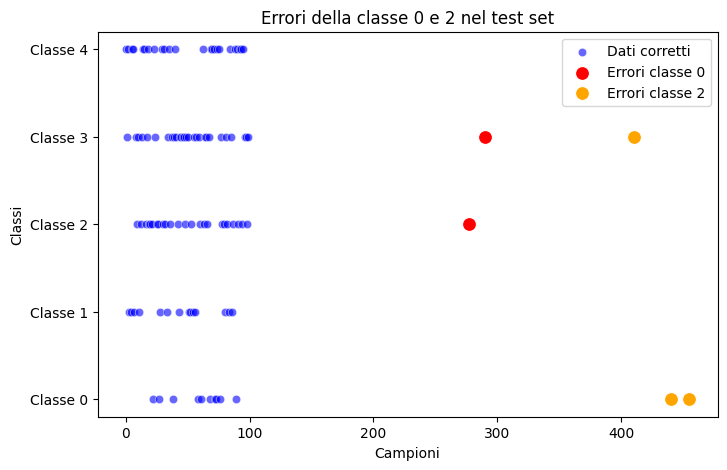

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Dati corretti
sns.scatterplot(x=range(len(y_test)), y=y_test, color="blue", label="Dati corretti", alpha=0.6)

# Errori della classe 0
sns.scatterplot(x=errori_classe_0.index, y=errori_classe_0["Valore Predetto"], color="red", label="Errori classe 0", s=100)

# Errori della classe 2
sns.scatterplot(x=errori_classe_2.index, y=errori_classe_2["Valore Predetto"], color="orange", label="Errori classe 2", s=100)

plt.yticks([0,1,2,3,4], labels=["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4"])

plt.xlabel("Campioni")
plt.ylabel("Classi")
plt.title("Errori della classe 0 e 2 nel test set")
plt.legend()
plt.show()


In [217]:
# Controllo se ci sono degli squilibri tra le classi:
print(df["Frutto"].value_counts())
print("\nDistribuzione nel Test set:\n", y_test.value_counts())

Frutto
3    100
1    100
0    100
4    100
2    100
Name: count, dtype: int64

Distribuzione nel Test set:
 Frutto
3    28
4    24
2    24
1    14
0    10
Name: count, dtype: int64


Si è osservato che le classi nel dataset non sono completamente bilanciate. Per migliorare la classificazione, ho provato ad applicare il bilanciamento delle classi e a modificare la metrica di peso utilizzata nel modello KNN. Tuttavia, questi cambiamenti hanno portato a un peggioramento delle performance del modell.